<a href="https://colab.research.google.com/github/Vishlesh26/DRL-project/blob/main/Start1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get install -y swig
!pip install gymnasium[box2d] stable-baselines3[extra] torch


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,401 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [4]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [6]:
env = gym.make("LunarLander-v3")   # classic control env
env = DummyVecEnv([lambda: env])   # wrapper for SB3

/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

In [7]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100_000)   # 100k steps to start


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 997  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


-----------------------------------------
| time/                   |             |
|    fps                  | 781         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007160005 |
|    clip_fraction        | 0.0137      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.000338    |
|    learning_rate        | 0.0003      |
|    loss                 | 418         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00705    |
|    value_loss           | 1.14e+03    |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 673          |
|    iterations           | 3            |
|    time_elapsed         | 9            |
|    total_timesteps      | 6

In [8]:
model.save("ppo_lunarlander")
# To reload:
model = PPO.load("ppo_lunarlander")


In [10]:
import time

env = gym.make("LunarLander-v3", render_mode="human")

obs, _ = env.reset()
for _ in range(1000):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, _ = env.reset()
    time.sleep(0.02)   # slow down rendering
env.close()


/usr/local/lib/python3.12/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


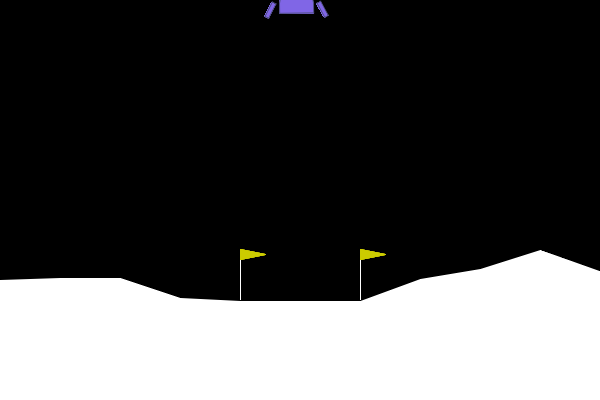

In [11]:
import matplotlib.pyplot as plt

env = gym.make("LunarLander-v3", render_mode="rgb_array")
obs, _ = env.reset()
frames = []

for _ in range(500):
    action, _ = model.predict(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if terminated or truncated:
        obs, _ = env.reset()

env.close()

import imageio

imageio.mimsave("lunarlander.gif", frames, fps=30)

from IPython.display import Image
Image(filename="lunarlander.gif")

